#IFT6135-A2023
#Assignment 1: Practical

You must fill in your answers to various questions in this notebook, following which you must export this notebook to a Python file named `solution.py` and submit it on Gradescope.

Only edit the functions specified in the PDF (and wherever marked – `# WRITE CODE HERE`). Do not change definitions or edit the rest of the template, else the autograder will not work.

**Make sure to request a GPU runtime with `Runtime -> Change runtime type -> <GPU of your choice>` during VGG training**

In [ ]:
# DO NOT MODIFY!
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
if __name__ == "__main__":
  # load data
  from tensorflow.keras.datasets import mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## Question 1: Multilayer Perceptron (MLP)


###1.1: Implementing single perceptron with NumPy (5 Points)

**Definition**
Perceptrons are the building blocks of MLPs. A perceptron simulates a biological neuron which can be activated or fired when responding to a stimulus. The equation of a perceptron is as follow:

$$ f(x) = \begin{cases} 1 && \text{if} & a(\mathbf{w} \cdot \mathbf{x} + b) > t \\ 0 && \text{if} & \text{otherwise} \end{cases} $$

where inputs $\mathbf{x}$ and weights $\mathbf{w}$ are multidimensional vectors, bias $b$ is a scalar, $a(.)$ is an activation function, and $t$ is a scalar threshold. This equation is binary, imitating the 'activated/fired' state and the 'resting/inactive' state of a biological neuron. In the simplest case, by choosing the identity function as $a(.)$ and $0$ as $t$, we get a linear separator. By choosing the sigmoid function $\frac{1}{1 + e^{-x}}$ as $a$ and $0.5$ as $t$, we get a logistic separator. **Note**: depending on context, perceptrons may be defined as strictly the linear separator.

**Loss function** Since $\mathbf{x}$ and $b$ are properties of the perceptron, they can be adjusted or trained to fit existing data. This very roughly corresponds to adjusting when does a neuron activate or fire given different stimuli. The first step is to quantify how close does our perceptron model fit existing data, which can be done using a loss function. Let $y$ be our binary labeled data and $\hat{y} = f(x)$ be our perceptron's predictions, we can define our loss function as:

$$ L(y, \hat{y}) = \lvert y - \hat{y} \rvert $$

This is only one of the many losses we can use, it makes intuitive sense as the distance between our label and prediction. Better losses exist, we will see them later.

**Backpropagation** Once we defined the loss, we can start adjusting our model by changing its internal weights $\mathbf{w}$ and bias $b$. The algorithm to do so is called backpropagation, which takes the gradient of the loss function w.r.t. both $\mathbf{w}$ and $b$. The gradient indicates the direction of the steepest ascent of the loss function at the current parameter, and can be seen as an indicator of where to go to most effectively maximize or minimize the loss function. By pairing it with a learning rate $lr$, the backpropagation is defined as follow:

$$ \begin{aligned}
\mathbf{w}_{t+1} &= \mathbf{w}_t - lr \cdot \frac{\partial L}{\partial \mathbf{w}} \\
\frac{\partial L}{\partial \mathbf{w}} &= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \mathbf{w}} \\
&= -\text{sgn}(y - \hat{y}) \cdot \text{max}(0, \mathbf{x}) \\
b_{t+1} &= b_t - lr \cdot \frac{\partial L}{\partial b} \\
\frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b} \\
&= -\text{sgn}(y - \hat{y}) \cdot 1
\end{aligned}$$

In the section below, implement a perceptron with the ReLu activation function and the absolute value loss function as shown above. The general code blocks are provided, fill in what is missing.

In [ ]:
class BinaryPerceptron:
  def __init__(self, input_dim):
    '''
    Initialize perceptron with random parameters
    '''
    self.w = np.random.randn(input_dim)
    self.b = 0

  def relu(self, x):
    '''
    Implement the ReLu function

    :param x: input tensor

    :return: x after ReLu function
    '''
    # WRITE CODE HERE
    # return ...
    return np.maximum(0,x)
    #pass

  def fire(self, x):
    '''
    Implement function determining whether perceptron is activated/fired given stimulus x. (Corresponds to f(x) above)

    :param x: input tensor

    :return: 1 if perceptron is fired, 0 otherwise
    '''
    # WRITE CODE HERE
    o = np.dot(x,self.w)+self.b
    a = self.relu(o)
    return 1 if a > 0 else 0

  def train(self, x, y, lr):
    '''
    Implement code for backpropagation used to train the model

    :param x: input vector x
    :param y: target label y
    :param lr: learning rate

    :return: l1 loss
    '''
    y_hat = self.fire(x)
    diff = y - y_hat

    # WRITE CODE HERE
    gradient_w = -1*np.sign(diff)*np.maximum(0,x)
    gradienb_b = -1*np.sign(diff)
    self.w = self.w-lr*gradient_w
    self.b = self.b-lr*gradienb_b

    loss = np.abs(diff)
    return loss

Train the above model to fit the data below, using a learning rate of $0.001$. Graph your results using the provided graph function.

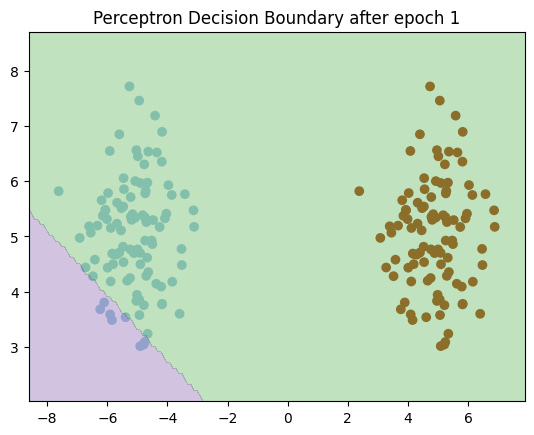

    accuracy after epoch 1:  0.25


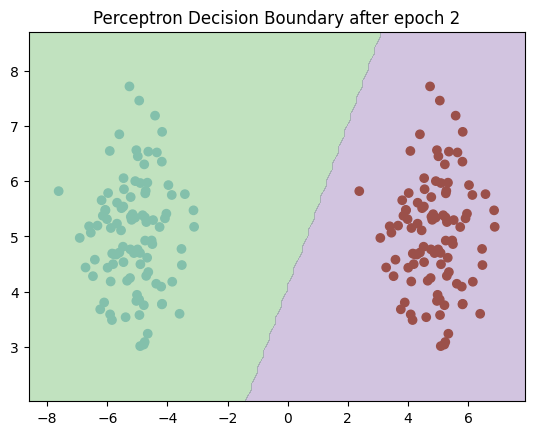

    accuracy after epoch 2:  0.88


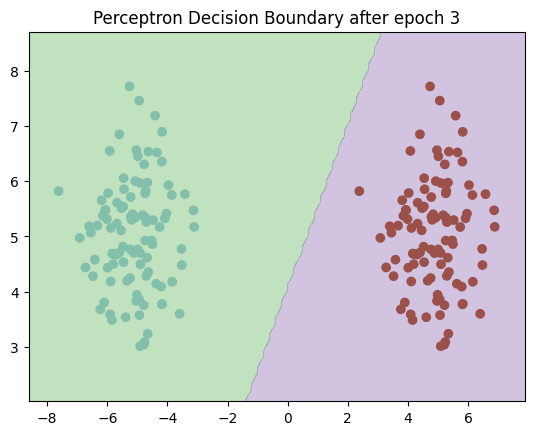

    accuracy after epoch 3:  1.0


In [ ]:
if __name__ == "__main__":

  # Generate binary synthetic data and define graph function, DO NOT MODIFY!
  # 100 data of Class 0 centered at (-5, -5)
  # 100 data of Class 1 centered at (5, 5)
  num_samples = 100
  np.random.seed(42)
  X_class0 = np.random.randn(num_samples, 2) + np.array([-5, 5])
  np.random.seed(42)
  X_class1 = np.random.randn(num_samples, 2) + np.array([5, 5])
  X = np.vstack([X_class0, X_class1])
  y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])
  np.random.seed(42)
  shuffle_idx = np.random.permutation(len(X))
  X = X[shuffle_idx]
  y = y[shuffle_idx]

  def graph(X, y, perceptron, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data points")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    Z = np.array([perceptron.fire(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired, levels=[-1, 0, 1])
    plt.title(title)
    plt.show()

  # Train the perceptron
  num_epochs = 3
  perceptron = BinaryPerceptron(input_dim=2)
  for i in range(num_epochs):
    losses = []
    for j in range(num_samples * 2):
      # WRITE CODE HERE
      loss =perceptron.train(X[j],y[j],0.001)
      losses.append(loss)

    graph(X, y, perceptron, f'Perceptron Decision Boundary after epoch {i + 1}')
    print(f"    accuracy after epoch {i + 1}: ", sum(1 for loss in losses if loss == 0) / (num_samples * 2))

###Question 1.2: Implementing MLPs with NumPy (25 Points)

Single perceptrons are linear classifiers and are very limited to what they can mimic in terms of data distribution. Multilayer perceptrons (MLPs) are layered perceptron networks that act as a whole to produce an output. They are proven to be universal function approximators, meaning they can approximate any continuous function given enough parameters. A layer in a MLP is defined as follow:

$$ \begin{aligned}
\mathbf{o_{l+1}} &= \mathbf{W_l} \cdot \mathbf{a_l} + \mathbf{b_l} \\
\mathbf{a_{l+1}} &= \mathbf{a(o_{l+1})}
\end{aligned} $$

where $\mathbf{o_{l+1}}$ is the preactivation output of the next layer, $\mathbf{a_{l+1}}$ is the postactivation output of the next layer, $\mathbf{W_l}$ is the weights of the current layer, $\mathbf{a_l}$ is the input to the current layer/output of last layer, $\mathbf{b_l}$ is the biases of the current layer, and $a(.)$ is the activation function.

For the first/input layer, $\mathbf{a_l}$ is the input. For the last/output layer, we use the softmax activation function paired with cross-entropy loss. In this exercise, you will implement a MLP from scratch using NumPy and train it with the MNIST dataset.

In [ ]:
class MLP(object):

  def __init__(self,
               layer_dims = (784, 128, 64, 10),
               activation = "relu",
               epsilon = 1e-6,
               lr = 0.01
               ):
    super().__init__()

    assert activation in ["relu", "sigmoid", "tanh"], "activation function needs to be among relu, sigmoid, tanh."
    self.layer_dims = layer_dims
    self.activation = activation
    self.epsilon = epsilon
    self.lr = lr
    self.init_parameters()

  def init_parameters(self):
    '''
    Initialize model parameters. See PDf for more details

    '''
    self.parameters = []
    for i, layer_dim in enumerate(self.layer_dims[:-1]):
      # WRITE CODE HERE
      w = np.random.uniform(-1/np.sqrt(784), 1/np.sqrt(784), (layer_dim, self.layer_dims[i+1]))
      b = np.zeros((1,self.layer_dims[i+1]))
      self.parameters.append({f'w' : w, f'b' : b})

  def activation_fn(self, x):
    '''
    Implementation of relu, sigmoid and tanh activation functions

    :param x: input (preactivation) vector

    :return: input after activation function
    '''
    if self.activation == "relu":
      return np.maximum(0, x)
    elif self.activation == "sigmoid":
      return 1 / (1 + np.exp(-x))
    elif self.activation == "tanh":
      return np.tanh(x)

  def gradient_activation_fn(self, x):
    '''
    Implementation of the derivative function of the relu, sigmoid and tanh activation functions

    :param x: input (postactivation) vector

    :return: input after derivative of activation function
    '''
    if self.activation == "relu":
      # WRITE CODE HERE
      #pass
      return np.where(x > 0, 1, 0)

    elif self.activation == "sigmoid":
      # WRITE CODE HERE
      #pass
      sigmoid = 1 / (1 + np.exp(-x))
      return sigmoid * (1 - sigmoid)

    elif self.activation == "tanh":
      # WRITE CODE HERE
      #pass
      return 1 - np.tanh(x)**2


  def softmax(self, x):
    '''
    Implement code for the softmax function.

    :param x: input vector

    :return: vector with probabilities after softmax
    '''
    # WRITE CODE HERE
    #pass
    #print(x)
    exp_x = np.exp(x-np.max(x, axis=1, keepdims=True))
    softmax_values = exp_x / exp_x.sum(axis=1, keepdims=True)
    #print(softmax_values)
    return softmax_values

  def layer_forward(self, x, layer_number):
    '''
    Implement code for forward/inference for the current layer

    :param x: input vector to the current layer

    :return: output vector after the current layer
    '''
    w = self.parameters[layer_number]['w']
    b = self.parameters[layer_number]['b']
    # WRITE CODE HERE
    # pass
    o =np.dot(x, w) + b
    if layer_number == len(self.parameters) - 1:
      a =self.softmax(o)
      #pass
    else:
      a =self.activation_fn(o)
      #pass
    self.forward_cache.append({'o' : o, 'a' : a})
    return a

  def forward(self, x):
    '''
    Apply layer_forward across all layers.

    :param x: input vector to first layer

    :return: output vector at the output layer
    '''
    self.forward_cache = [{'a' : x}]
    y_hat = x
    for i in range(len(self.parameters)):
      # WRITE CODE HERE
      y_hat = self.layer_forward(y_hat, i)
      #pass
    return y_hat

  def cross_entropy_loss(self, y_hat, y):
    '''
    Implement cross-entropy loss for classification

    :param y_hat: model predictions
    :param y: true labels

    :return: cross-entropy loss between y and y_hat
    '''
    y_hat[np.where(y_hat < self.epsilon)] = self.epsilon
    y_hat[np.where(y_hat > 1 - self.epsilon)] = 1 - self.epsilon

    # WRITE CODE HERE
    loss = -np.sum(y * np.log(y_hat)) / y.shape[0]
    return loss

  def layer_backward(self, gradient, layer_number):
    '''
    Implementation of backpropagation for the current layer. It only calculates the gradients and does not perform updates.

    :param gradient: if output layer: gradient of current layer's preactivation output (gradient_o) w.r.t. loss
                     if other layers: gradient of current layer's postactivation output (gradient_a) w.r.t. loss
    :param layer_number: index of the current layer

    :return: (gradient of previous layer's output w.r.t loss,
             gradient of current layers' weights w.r.t loss,
             gradient of current layers' biases w.r.t. loss)
    '''
    a = self.forward_cache[layer_number]['a']
    a_prev = self.forward_cache[layer_number - 1]['a']
    w = self.parameters[layer_number - 1]['w']

    # WRITE CODE HERE
    if layer_number == len(self.layer_dims):
      gradient_o = gradient
    else:
      gradient_o = gradient * self.gradient_activation_fn(a)
      #pass

    gradient_w = np.dot(a_prev.T, gradient_o)/a_prev.shape[0]
    gradient_b = np.sum(gradient_o,axis=0,keepdims=True)/a_prev.shape[0]
    gradient_a_prev = np.dot(gradient_o, w.T)

    return gradient_a_prev, gradient_w, gradient_b

  def backward(self, y_hat, y):
    '''
    Implementation of backpropagation. It takes the gradients from 'layer_backwards' and perform updates on weights and biases.

    :param y_hat: model predictions
    :param y: true labels (one-hot format)
    '''
    gradient = y_hat - y
    for i in range(len(self.parameters), 0, -1):
      gradient, gradient_w, gradient_b = self.layer_backward(gradient, i)
      # WRITE CODE HERE
      self.parameters[i - 1]['w'] -= self.lr * gradient_w
      self.parameters[i - 1]['b'] -= self.lr * gradient_b

  @staticmethod
  def one_hot_encode(labels, num_classes):
    '''
    Implementation of one-hot encoding. See PDF for more details

    :param labels: vector with class indexes
    :param num_classes: number of classes in the one-hot encoding

    :return: 2d array of one-hot encoded labels
    '''
    # WRITE CODE HERE
    #pass
    one_hot = np.zeros((labels.shape[0], num_classes))
    one_hot[np.arange(labels.shape[0]), labels] = 1
    return one_hot

  def train(self, x, y, batch_size=64, num_iterations=None):
    '''
    Implementation of MLP model training. It also automatically graphs training results.

    :param x: batch inputs
    :param y: batch labels (one-hot encoded)
    :param batch_size: batch size
    :param num_iterations: number of iterations to train the model (in batches). If left None, the model will train for 1 epoch across all data.

    '''
    def graph_loss_and_accuracy(losses, accuracies):
      iterations = np.arange(len(losses)) + 1

      fig, ax1 = plt.subplots()
      color_ax1 = 'cyan'
      color_ax2 = 'red'
      linewidth = 0.2
      ax1.set_xlabel('iterations')
      ax1.set_ylabel('cross entropy loss', color=color_ax1)
      ax1.plot(iterations, losses, color=color_ax1, linewidth=linewidth)
      ax1.tick_params(axis='y', labelcolor=color_ax1)

      ax2 = ax1.twinx()
      ax2.set_ylabel('accuracy on training set', color=color_ax2)
      ax2.plot(iterations, accuracies, color=color_ax2, linewidth=linewidth)
      ax2.tick_params(axis='y', labelcolor=color_ax2)
      plt.show()

    self.losses = []
    self.accuracies = []
    num_batches = x.shape[0] // batch_size
    # train 1 epoch by default
    if num_iterations is None: num_iterations = num_batches

    for i in range(num_iterations):
      start_idx = i * batch_size
      end_idx = start_idx + batch_size
      x_batch = x[start_idx : end_idx]
      y_batch = y[start_idx : end_idx]
      #print(x_batch)

      y_hat_batch = self.forward(x_batch)
      #print(y_hat_batch)
      loss = self.cross_entropy_loss(y_hat_batch, y_batch)
      #print(loss)
      accuracy = np.sum(y_hat_batch.argmax(axis=-1) == y_batch.argmax(axis=-1)) / batch_size
      #print(y_hat_batch)
      self.losses.append(loss)
      self.accuracies.append(accuracy)
      self.backward(y_hat_batch, y_batch)

    graph_loss_and_accuracy(self.losses, self.accuracies)

 # Train with batch sizes of 16 respectively, use default learning rate and activation function

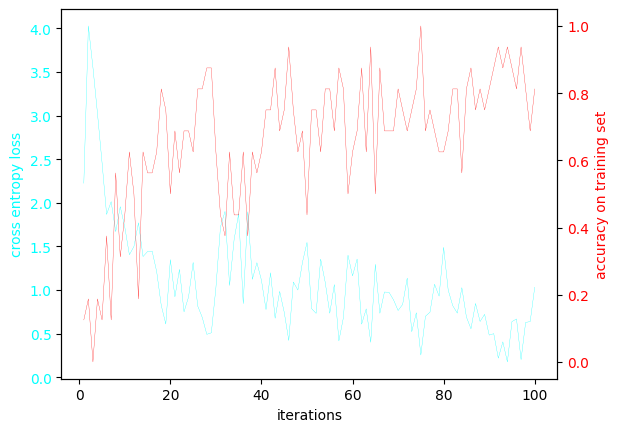

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP()
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=16,num_iterations=100)


  # WRITE CODE HERE
  # train with batch sizes of 16, 32, 64, 128 respectively, use default learning rate and activation function


  # train with learning rates of 0.1, 0.01, 0.001, 0.0001 respectively, use default batch size and activation function


  # train with activation functions of "relu", "sigmoid" and "tanh" respectively, use default learning rate and batch size

 # train with batch sizes of 32 respectively, use default learning rate and activation function

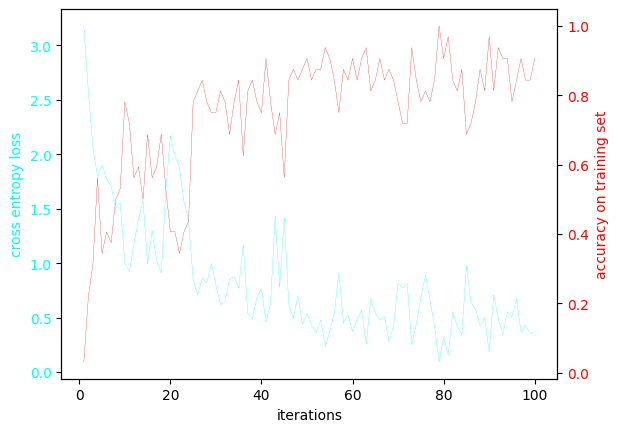

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP()
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=32,num_iterations=100)

 # train with batch sizes of 64 respectively, use default learning rate and activation function

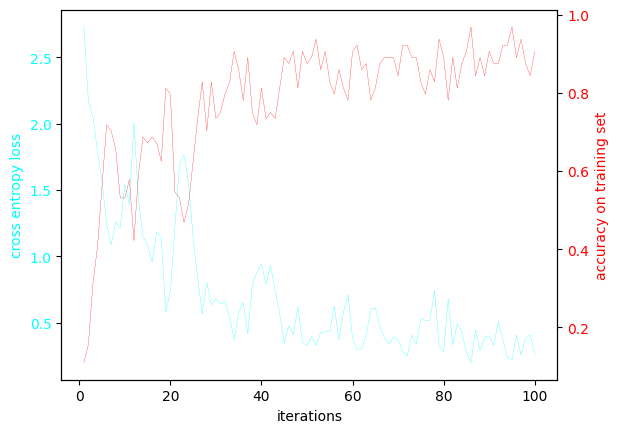

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP()
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)

 # train with batch sizes of 128 respectively, use default learning rate and activation function

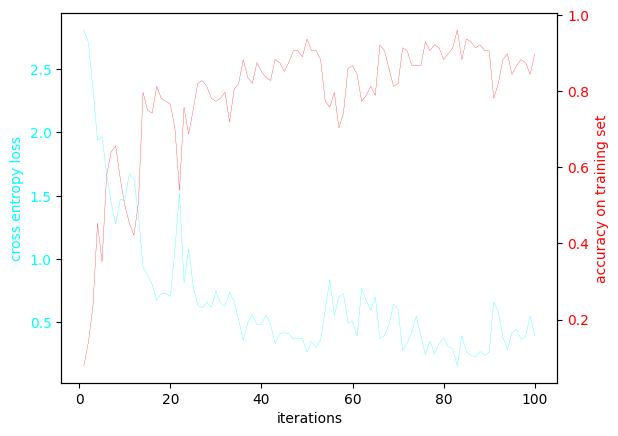

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP()
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=128,num_iterations=100)


  # train with learning rates of 0.1 respectively, use default batch size and activation function


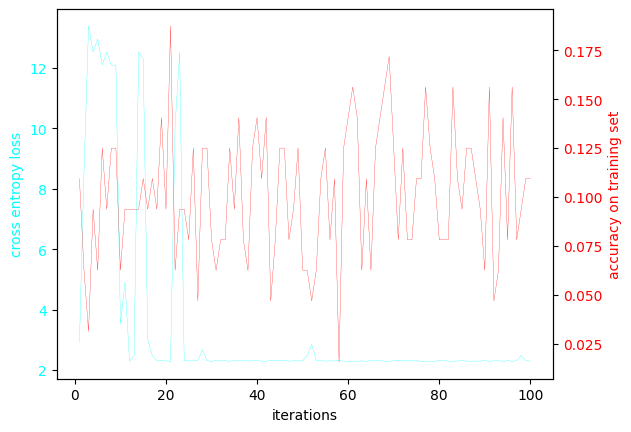

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(lr=0.1)
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)


  # train with learning rates of 0.01 respectively, use default batch size and activation function


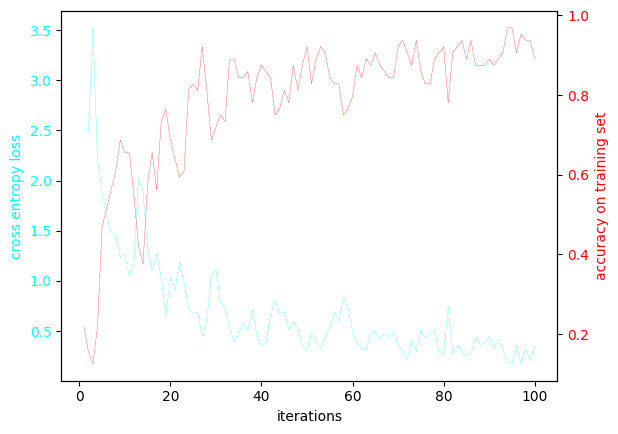

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(lr=0.01)
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)


  # train with learning rates of 0.001 respectively, use default batch size and activation function


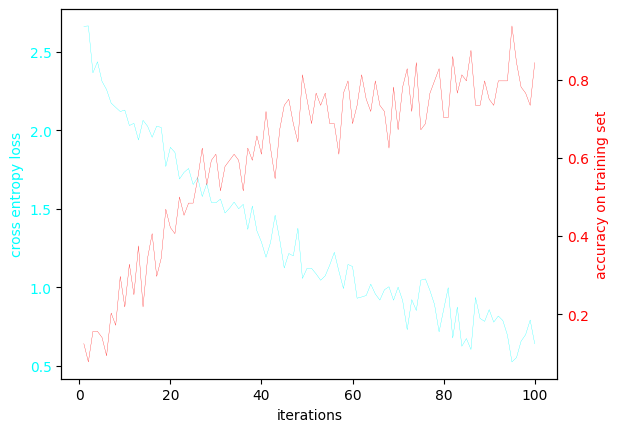

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(lr=0.001)
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)


  # train with learning rates of 0.0001 respectively, use default batch size and activation function


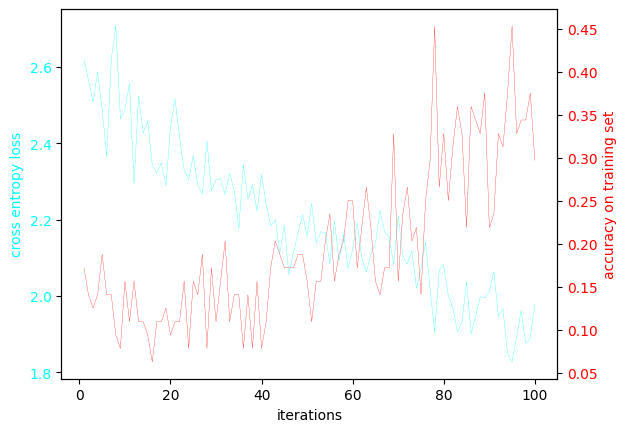

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(lr=0.0001)
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)

# train with activation functions of "relu" use default learning rate and batch size

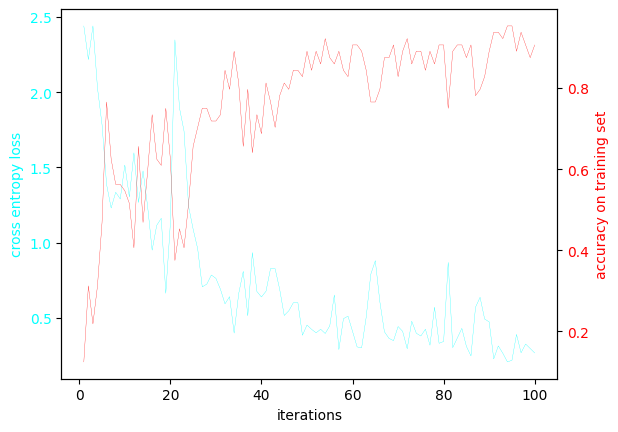

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(activation='relu')
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)

# train with activation functions of "sigmoid" respectively, use default learning rate and batch size

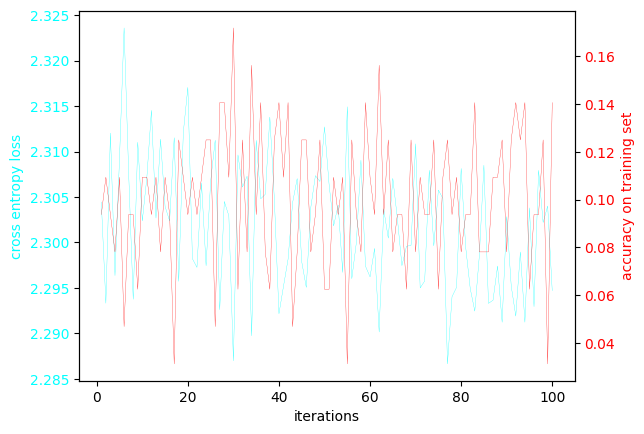

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(activation='sigmoid')
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)

# train with activation functions of "tanh" respectively, use default learning rate and batch size

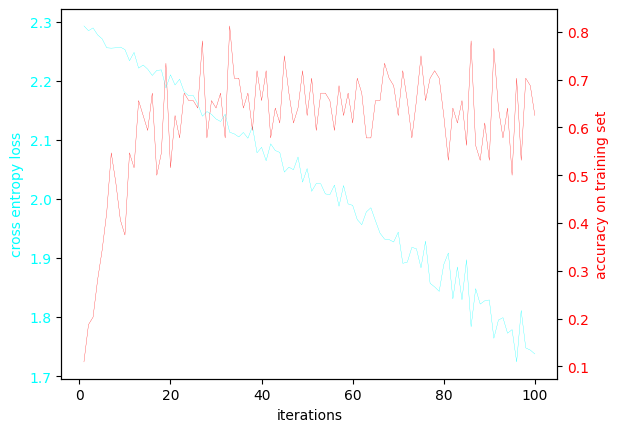

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)
  mymlp=MLP(activation='tanh')
  mymlp.train(x_train_mlp,y_train_mlp,batch_size=64,num_iterations=100)

## Question 2. Convolutional Neural Network (CNN)

#### Question 2.1: Implementing the convolution layer of CNN (TODO)

In [ ]:
class Convolution2dLayer(object):
  """
  Implements a 2D convolution layer.
  """

  def __init__(self, filter_size=3, stride=1, n_outchannel=32):
    """
    Constructor of the Convolution2dLayer class.

    Note: We assume that the input images have only a single channel.

    :param filter_size: filter size to use for convolution. We assume equal height and width. (int, default 3)
    :param stride: stride for convolution. (int, default 1)
    :n_outchannel: number of output channels, i.e., number of filters in the layer. (int, default 32)
    """
    super().__init__()

    self.filter_size = filter_size
    self.stride = stride
    self.n_outchannel = n_outchannel
    self.initialize_weights()

  def initialize_weights(self):
    """
    Initializes the weights of the CNN from uniform distribution(0, 1) and the biases to zeros.
    """
    # self.weights is an np.array of shape (n_outchannel, filter_size, filter_size)
    # We do not consider biases in this convolution layer implementation
    self.weights = np.random.uniform(low=0, high=1, size=(self.n_outchannel, self.filter_size, self.filter_size))

  def _get_filtersizeXfiltersize_views(self, x):
    """
    Function to iterate through the input with given stride.

    :param x: input of shape (batch size, 1, h, w). We assume input has only 1 channel.
              for a list of inputs, h and w must be consistent across the inputs.

    :returns: a generator that produces the current 'view' of the input and its indices given the stride
              it will be a tuple of following format: ( view's row index, view's column index, view with shape (batch size, 1, filtersize, filtersize) )

    """
    rows, cols = x.shape[2], x.shape[3]

    # loop over rows and columns with a stride of filter_size x filter_size to get views
    for i in range(0, rows, self.stride):
      for j in range(0, cols, self.stride):
        if i + self.filter_size - 1 < rows and j + self.filter_size - 1 < cols:
          #WRITE CODE HERE
          # yield ...
          yield i, j, x[:, :, i:i+self.filter_size, j:j+self.filter_size]
          #pass

  def forward(self, x):
    """
    Function to forward 2d convolution.
    Note: You need not flip the kernel! You may just implement cross-correlation.

    :param x: Inputs to convolve. This may contain multiple input examples, not just one.
              Note: We assume that the input images have only a single channel.

    :returns: Inputs and the result of the convolution operation on the inputs stored in cache.
    """
    cache = {}

    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    cache["x"] = x
    output_h = int((x.shape[2] - self.filter_size) / self.stride + 1)
    output_w = int((x.shape[3] - self.filter_size) / self.stride + 1)
    cache["out"] = np.zeros((x.shape[0], self.weights.shape[0], output_h, output_w))

    for view_h, view_w, view in self._get_filtersizeXfiltersize_views(x):
      # WRITE CODE HERE
      for k in range(self.n_outchannel):
            result = np.sum(view * self.weights[k], axis=(1,2,3))
            cache["out"][:, k, view_h//self.stride, view_w//self.stride] = result
      #pass

    return cache

  def backward(self, cache, grad_output):
    """
    Function to backward gradients of 2d convolution

    :param cache: dictionary containing the inputs and the result of the convolution operation applied on them.
    :param grad_output: gradient of the loss w.r.t. the outputs of the convolution layer.

    :returns: Gradient of the loss w.r.t. the parameters of the convolution layer.
    """
    # grads is an np.array containing the gradient of the loss w.r.t. the parameters in the convolution layer
    # Remember to account for the number of input examples!
    x = cache["x"]
    grads = np.zeros(self.weights.shape)
    for n in range(grad_output.shape[0]):
      for i in range(self.n_outchannel):
        for h in range(self.filter_size):
          for w in range(self.filter_size):
            # WRITE CODE HERE
            #pass
            x_slice = x[n, 0, h: h + grad_output.shape[2]*self.stride: self.stride, w: w + grad_output.shape[3]*self.stride: self.stride]
            grads[i, h, w] += np.sum(x_slice * grad_output[n, i])


    return grads

#### Question 2.2: Implementing the max-pooling layer of CNN

In [ ]:
class MaxPooling2dLayer(object):
  """
  Implements a 2D max-pooling layer.

  """
  def __init__(self, filter_size=2):
    """
    Constructor of the MaxPooling2dLayer class.

    :param filter_size: size of filter for max-pooling. int, default 2
                        we assume equal height and width, and stride = height = width = filter_size
    """
    super().__init__()
    self.filter_size = filter_size

  def _get_filtersizeXfiltersize_views(self, x):
    """
    Function to iterate through the input with given stride.

    :param x: input of shape (batch size, 1, h, w). We assume input has only 1 channel.

    :returns: a generator that produce the current 'view' of the input with the given stride,
              will be a tuple of following format: ( view's row index, view's column index, view itself with shape (batch size, 1, filtersize, filtersize) )
    """
    rows, cols = x.shape[2], x.shape[3]

    for i in range(0, rows, self.filter_size):
      for j in range(0, cols, self.filter_size):
        if i + self.filter_size - 1 < rows and j + self.filter_size - 1 < cols:
          #WRITE CODE HERE
          yield i //self.filter_size, j//self.filter_size, x[:, :, i:i+self.filter_size, j:j+self.filter_size]
          #pass

  def forward(self, x):
    """
    Function to forward 2dPooling.

    :param x: Inputs to compute max-pooling for. This may contain multiple input examples, not just one.
              Note: The input dimensions to max-pooling are the output dimensions of the convolution!

    :returns: Inputs and the result of the max-pooling operation on the inputs stored in cache.
    """
    cache = {}
    cache["x"] = x
    output_h = int(x.shape[2] / self.filter_size)
    output_w = int(x.shape[3] / self.filter_size)
    cache["out"] = np.zeros((x.shape[0], x.shape[1], output_h, output_w))

    for view_h, view_w, view in self._get_filtersizeXfiltersize_views(x):
      # WRITE CODE HERE
      # cache["out"][:, :, ?, ?] = ?
      cache["out"][:, :, view_h, view_w] = np.max(view, axis=(2, 3))
      #pass

    return cache

  def backward(self, cache, grad_output):
    """
    Function to backward gradients of 2dPooling.

    :param cache: Contains the inputs and the result of the max-pooling operation applied on them.
    :param grad_output: Gradient of the loss with respect to the outputs of the max-pooling layer.

    :returns: Gradient of the loss with respect to the inputs to the max-pooling layer.
    """

    x = cache["x"]
    grads = np.zeros_like(x)

    for view_h, view_w, view in self._get_filtersizeXfiltersize_views(x):
      # WRITE CODE HERE
        max_vals = np.max(view, axis=(2,3), keepdims=True)
        mask = view == max_vals
        grads_view = mask * grad_output[:, :, view_h:view_h+1, view_w:view_w+1]
        grads[:, :, view_h*self.filter_size:view_h*self.filter_size+self.filter_size,
              view_w*self.filter_size:view_w*self.filter_size+self.filter_size] = grads_view
      #pass

    return grads

## Question 3: Implementation and experimentation


### Question 3.2

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

# Fix random seed, DO NOT CHANGE
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
class VGG16(nn.Module):
  """This class implements the VGG-16 architecture in PyTorch"""

  def __init__(self, activation_str="relu"):
    """
      Constructor for the VGG16 class.

      activation_str: string, default "relu"
        Activation function to use.
    """
    super(VGG16, self).__init__()

    self.n_classes = 10 # WRITE CODE HERE
    self.activation_str = activation_str
    # self.initialization = initialization

    self.conv_layer_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1,stride=1)
    self.conv_layer_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
    self.conv_layer_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.conv_layer_4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.conv_layer_5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
    self.conv_layer_6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
    self.conv_layer_7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
    self.conv_layer_8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
    self.conv_layer_9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv_layer_10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv_layer_11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv_layer_12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv_layer_13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)


    # Add 2D batch normalization after every convolutional layer
    self.conv_layer_1_bn = nn.BatchNorm2d(64)
    self.conv_layer_2_bn = nn.BatchNorm2d(64)
    self.conv_layer_3_bn = nn.BatchNorm2d(128)
    self.conv_layer_4_bn = nn.BatchNorm2d(128)
    self.conv_layer_5_bn = nn.BatchNorm2d(256)
    self.conv_layer_6_bn = nn.BatchNorm2d(256)
    self.conv_layer_7_bn = nn.BatchNorm2d(256)
    self.conv_layer_8_bn = nn.BatchNorm2d(512)
    self.conv_layer_9_bn = nn.BatchNorm2d(512)
    self.conv_layer_10_bn = nn.BatchNorm2d(512)
    self.conv_layer_11_bn = nn.BatchNorm2d(512)
    self.conv_layer_12_bn = nn.BatchNorm2d(512)
    self.conv_layer_13_bn = nn.BatchNorm2d(512)

    self.max_pool_layer_1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.max_pool_layer_2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.max_pool_layer_3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.max_pool_layer_4 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.max_pool_layer_5 = nn.MaxPool2d(kernel_size=2, stride=2)


    self.fc_1 = nn.Linear(512*7*7, 4096)
    self.fc_2 = nn.Linear(4096, 4096)
    self.fc_3 = nn.Linear(4096, self.n_classes)

    # Initialize the weights of each trainable layer of your network using xavier_uniform initialization
    # WRITE CODE HERE
    for m in self.modules():
        if isinstance(m, nn.Conv2d):
            init.xavier_uniform_(m.weight)
            # if m.bias is not None:
            #init.constant_(m.bias, 0)
        # elif isinstance(m, nn.BatchNorm2d):
        #     init.constant_(m.weight, 1)
        #     init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            init.xavier_uniform_(m.weight)
            #init.constant_(m.bias, 0)

  def activation(self, input):
    """
      input: Tensor
        Input on which the activation is applied.

      Output: Result of activation function applied on input.
        E.g. if self.activation_str is "relu", return relu(input).
    """
    if self.activation_str == "relu":
      # WRITE CODE HERE
      # pass
      return F.relu(input)
    elif self.activation_str == "tanh":
      # WRITE CODE HERE
      # pass
      return torch.tanh(input)
    else:
      raise Exception("Invalid activation")
    return 0


  def get_first_conv_layer_filters(self):
    """
      Outputs: Returns the filters in the first convolution layer.
    """
    return self.conv_layer_1.weight.clone().cpu().detach().numpy()

  def get_last_conv_layer_filters(self):
    """
      Outputs: Returns the filters in the last convolution layer.
    """
    return self.conv_layer_13.weight.clone().cpu().detach().numpy()

  def forward(self, x):
    """
      x: Tensor
        Input to the network.

      Outputs: Returns the output of the forward pass of the network.
    """
    # WRITE CODE HERE
    x = self.conv_layer_1_bn(self.conv_layer_1(x))
    x = self.activation(x)
    x = self.conv_layer_2_bn(self.conv_layer_2(x))
    x = self.activation(x)
    x = self.max_pool_layer_1(x)

    x = self.conv_layer_3_bn(self.conv_layer_3(x))
    x = self.activation(x)
    x = self.conv_layer_4_bn(self.conv_layer_4(x))
    x = self.activation(x)
    x = self.max_pool_layer_2(x)

    x = self.conv_layer_5_bn(self.conv_layer_5(x))
    x = self.activation(x)
    x = self.conv_layer_6_bn(self.conv_layer_6(x))
    x = self.activation(x)
    x = self.conv_layer_7_bn(self.conv_layer_7(x))
    x = self.activation(x)
    x = self.max_pool_layer_3(x)

    x = self.conv_layer_8_bn(self.conv_layer_8(x))
    x = self.activation(x)
    x = self.conv_layer_9_bn(self.conv_layer_9(x))
    x = self.activation(x)
    x = self.conv_layer_10_bn(self.conv_layer_10(x))
    x = self.activation(x)
    x = self.max_pool_layer_4(x)

    x = self.conv_layer_11_bn(self.conv_layer_11(x))
    x = self.activation(x)
    x = self.conv_layer_12_bn(self.conv_layer_12(x))
    x = self.activation(x)
    x = self.conv_layer_13_bn(self.conv_layer_13(x))
    x = self.activation(x)
    x = self.max_pool_layer_5(x)

    x = x.view(x.size(0), -1)
    x = self.activation(self.fc_1(x))
    x = self.activation(self.fc_2(x))
    x = self.fc_3(x)
    x = F.softmax(x, dim=1)

    return x

### Question 3.3

In [ ]:
from matplotlib.rcsetup import validate_bbox
def get_cifar10():
  normalize = transforms.Normalize(
      mean=[0.4914, 0.4822, 0.4465],
      std=[0.2023, 0.1994, 0.2010],
  )

  # define transforms
  transform = transforms.Compose([
          transforms.Resize((227,227)),
          transforms.ToTensor(),
          normalize,
  ])

  train_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=True, download=True, transform=transform)
  train_loader = torch.utils.data.DataLoader(
      train_dataset, batch_size=64, shuffle=True, num_workers=2)

  val_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=transform)
  val_loader = torch.utils.data.DataLoader(
      val_dataset, batch_size=64, shuffle=False, num_workers=2)

  return train_loader, val_loader

def train_loop(epoch, model, train_loader, criterion, optimizer):
  """
    epoch: int
      Number of the current training epoch (starting from 0).
    model: VGG16
      The model to train, which is an instance of the VGG16 class.
    train_loader: DataLoader
      The training dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.
    optimizer: Optimizer
      An Optimizer object for the Adam optimizer.

    Outputs: Returns average train_acc and train_loss for the current epoch.
  """
  train_acc = 0.
  train_loss = 0.

  # WRITE CODE HERE
  model.train()
  n=0

  for inputs, targets in train_loader:
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()

      _, predicted = outputs.max(1)
      train_acc += predicted.eq(targets).sum().item()
      train_loss += loss.item()
      n=n+len(targets)
  train_acc=train_acc/n
  train_loss=train_loss/n
  print(f"Epoch: {epoch} | Train Acc: {train_acc:.6f} | Train Loss: {train_loss:.6f}")
  return train_acc, train_loss

def valid_loop(epoch, model, val_loader, criterion):
  """
    epoch: int
      Number of the current epoch (starting from 0).
    model: VGG16
      The model to train, which is an instance of the VGG16 class.
    val_loader: DataLoader
      The validation dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.

    Outputs: Returns average val_acc and val_loss for the current epoch.
  """
  val_acc = 0.
  val_loss = 0.

  # WRITE CODE HERE
  model.eval()
  n=0
  with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        _, predicted = outputs.max(1)
        val_acc += predicted.eq(targets).sum().item()
        val_loss += loss.item()
        n=n+len(targets)
  val_acc=val_acc/n
  val_loss=val_loss/n

  print(f"Epoch: {epoch} | Val Acc: {val_acc:.6f}   | Val Loss: {val_loss:.6f}")
  return val_acc, val_loss

In [ ]:
if __name__ == "__main__":
  activation_str = "relu"
  initialization = "xavier_normal"
  train_accs, train_losses, val_accs, val_losses = [], [], [], []
  n_epochs = 25

  model = VGG16(
    activation_str=activation_str,

  ).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

  train_loader, val_loader = get_cifar10()

  for epoch in range(n_epochs):
    # Training
    train_acc, train_loss = train_loop(epoch, model, train_loader, criterion, optimizer)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    val_acc, val_loss = valid_loop(epoch, model, val_loader, criterion)
    val_accs.append(val_acc)
    val_losses.append(val_loss)

#torch.save(model.state_dict(), '/content/drive/MyDrive/IFT(RL)/HW01/vgg16.pth')

100%|██████████| 170498071/170498071 [00:01<00:00, 86129135.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch: 0 | Train Acc: 0.386000 | Train Loss: 0.032460
Epoch: 0 | Val Acc: 0.470000   | Val Loss: 0.031314
Epoch: 1 | Train Acc: 0.506640 | Train Loss: 0.030586
Epoch: 1 | Val Acc: 0.544300   | Val Loss: 0.030118
Epoch: 2 | Train Acc: 0.571980 | Train Loss: 0.029577
Epoch: 2 | Val Acc: 0.568800   | Val Loss: 0.029686
Epoch: 3 | Train Acc: 0.618920 | Train Loss: 0.028846
Epoch: 3 | Val Acc: 0.590000   | Val Loss: 0.029398
Epoch: 4 | Train Acc: 0.692820 | Train Loss: 0.027732
Epoch: 4 | Val Acc: 0.681000   | Val Loss: 0.028014
Epoch: 5 | Train Acc: 0.736960 | Train Loss: 0.027047
Epoch: 5 | Val Acc: 0.692200   | Val Loss: 0.027781
Epoch: 6 | Train Acc: 0.770800 | Train Loss: 0.026536
Epoch: 6 | Val Acc: 0.729000   | Val Loss: 0.027261
Epoch: 7 | Train Acc: 0.799800 | Train Loss: 0.026091
Epoch: 7 | Val Acc: 0.730900   | Val Loss: 0.027208
Epoch: 8 | Train Acc: 0.825480 | Train Loss: 0.025686
Epoch: 8 

In [ ]:
torch.save(model.state_dict(), 'vgg16.pth')

In [ ]:
model = VGG16(
  activation_str='relu',

)

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/IFT(RL)/HW01/vgg16.pth'))
model.to(device)
model

VGG16(
  (conv_layer_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_12): Conv2d(512, 512, kernel_size=(3,

## Question 3.4

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch

class VGG16plusresidual(nn.Module):
    """This class implements the VGG-16 architecture with Residual Connections in PyTorch"""

    def __init__(self, activation_str="relu"):
        super(VGG16plusresidual, self).__init__()

        self.n_classes = 10
        self.activation_str = activation_str

        # Convolutional Layers
        self.conv_layer_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.conv_layer_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.conv_layer_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv_layer_4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv_layer_5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv_layer_6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv_layer_7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv_layer_8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv_layer_9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv_layer_10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv_layer_11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv_layer_12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv_layer_13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        # Batch Normalization
        self.conv_layer_1_bn = nn.BatchNorm2d(64)
        self.conv_layer_2_bn = nn.BatchNorm2d(64)
        self.conv_layer_3_bn = nn.BatchNorm2d(128)
        self.conv_layer_4_bn = nn.BatchNorm2d(128)
        self.conv_layer_5_bn = nn.BatchNorm2d(256)
        self.conv_layer_6_bn = nn.BatchNorm2d(256)
        self.conv_layer_7_bn = nn.BatchNorm2d(256)
        self.conv_layer_8_bn = nn.BatchNorm2d(512)
        self.conv_layer_9_bn = nn.BatchNorm2d(512)
        self.conv_layer_10_bn = nn.BatchNorm2d(512)
        self.conv_layer_11_bn = nn.BatchNorm2d(512)
        self.conv_layer_12_bn = nn.BatchNorm2d(512)
        self.conv_layer_13_bn = nn.BatchNorm2d(512)

        # Max Pooling Layers
        self.max_pool_layer_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool_layer_2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool_layer_3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool_layer_4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool_layer_5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.fc_1 = nn.Linear(512*7*7, 4096)
        self.fc_2 = nn.Linear(4096, 4096)
        self.fc_3 = nn.Linear(4096, self.n_classes)

        # Residual Connections
        self.residual_2 = nn.Identity()
        self.residual_4 = nn.Identity()
        self.residual_7 = nn.Identity()
        self.residual_10 = nn.Identity()
        self.residual_13 = nn.Identity()

        # Weight Initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.xavier_uniform_(m.weight)
            elif isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)

    def activation(self, input):
        if self.activation_str == "relu":
            return F.relu(input)
        elif self.activation_str == "tanh":
            return torch.tanh(input)
        else:
            raise Exception("Invalid activation")

    def forward(self, x):

        x = self.conv_layer_1_bn(self.conv_layer_1(x))
        x = self.activation(x)
        residual_layer = self.residual_2(x)
        x = self.conv_layer_2_bn(self.conv_layer_2(x))
        x = self.activation(x + residual_layer)   # Adding the residual connection
        x = self.max_pool_layer_1(x)


        x = self.conv_layer_3_bn(self.conv_layer_3(x))
        x = self.activation(x)
        residual_layer = self.residual_4(x)
        x = self.conv_layer_4_bn(self.conv_layer_4(x))
        x = self.activation(x + residual_layer)
        x = self.max_pool_layer_2(x)

        x = self.conv_layer_5_bn(self.conv_layer_5(x))
        x = self.activation(x)
        residual_layer = self.residual_7(x)
        x = self.conv_layer_6_bn(self.conv_layer_6(x))
        x = self.activation(x)
        x = self.conv_layer_7_bn(self.conv_layer_7(x))
        x = self.activation(x + residual_layer)
        x = self.max_pool_layer_3(x)


        x = self.conv_layer_8_bn(self.conv_layer_8(x))
        x = self.activation(x)
        residual_layer = self.residual_10(x)
        x = self.conv_layer_9_bn(self.conv_layer_9(x))
        x = self.activation(x)
        x = self.conv_layer_10_bn(self.conv_layer_10(x))
        x = self.activation(x + residual_layer)
        x = self.max_pool_layer_4(x)


        x = self.conv_layer_11_bn(self.conv_layer_11(x))
        x = self.activation(x)
        residual_layer = self.residual_13(x)
        x = self.conv_layer_12_bn(self.conv_layer_12(x))
        x = self.activation(x)
        x = self.conv_layer_13_bn(self.conv_layer_13(x))
        x = self.activation(x + residual_layer)
        x = self.max_pool_layer_5(x)

        x = x.view(x.size(0), -1)

        x = self.activation(self.fc_1(x))
        x = self.activation(self.fc_2(x))
        x = self.fc_3(x)
        x = F.softmax(x, dim=1)

        return x


In [ ]:
from matplotlib.rcsetup import validate_bbox
def get_cifar10():
  normalize = transforms.Normalize(
      mean=[0.4914, 0.4822, 0.4465],
      std=[0.2023, 0.1994, 0.2010],
  )

  # define transforms
  transform = transforms.Compose([
          transforms.Resize((227,227)),
          transforms.ToTensor(),
          normalize,
  ])

  train_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=True, download=True, transform=transform)
  train_loader = torch.utils.data.DataLoader(
      train_dataset, batch_size=64, shuffle=True, num_workers=2)

  val_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=transform)
  val_loader = torch.utils.data.DataLoader(
      val_dataset, batch_size=64, shuffle=False, num_workers=2)

  return train_loader, val_loader

def train_loop(epoch, model, train_loader, criterion, optimizer):
  """
    epoch: int
      Number of the current training epoch (starting from 0).
    model: VGG16
      The model to train, which is an instance of the VGG16 class.
    train_loader: DataLoader
      The training dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.
    optimizer: Optimizer
      An Optimizer object for the Adam optimizer.

    Outputs: Returns average train_acc and train_loss for the current epoch.
  """
  train_acc = 0.
  train_loss = 0.

  # WRITE CODE HERE
  model.train()
  n=0

  for inputs, targets in train_loader:
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()

      _, predicted = outputs.max(1)
      train_acc += predicted.eq(targets).sum().item()
      train_loss += loss.item()
      n=n+len(targets)
  train_acc=train_acc/n
  train_loss=train_loss/n
  print(f"Epoch: {epoch} | Train Acc: {train_acc:.6f} | Train Loss: {train_loss:.6f}")
  return train_acc, train_loss

def valid_loop(epoch, model, val_loader, criterion):
  """
    epoch: int
      Number of the current epoch (starting from 0).
    model: VGG16
      The model to train, which is an instance of the VGG16 class.
    val_loader: DataLoader
      The validation dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.

    Outputs: Returns average val_acc and val_loss for the current epoch.
  """
  val_acc = 0.
  val_loss = 0.

  # WRITE CODE HERE
  model.eval()
  n=0
  with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        _, predicted = outputs.max(1)
        val_acc += predicted.eq(targets).sum().item()
        val_loss += loss.item()
        n=n+len(targets)
  val_acc=val_acc/n
  val_loss=val_loss/n

  print(f"Epoch: {epoch} | Val Acc: {val_acc:.6f}   | Val Loss: {val_loss:.6f}")
  return val_acc, val_loss

In [ ]:
if __name__ == "__main__":
  activation_str = "relu"
  initialization = "xavier_normal"
  train_accs, train_losses, val_accs, val_losses = [], [], [], []
  n_epochs = 25

  model = VGG16plusresidual(
    activation_str=activation_str,

  ).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

  train_loader, val_loader = get_cifar10()

  for epoch in range(n_epochs):
    # Training
    train_acc, train_loss = train_loop(epoch, model, train_loader, criterion, optimizer)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    val_acc, val_loss = valid_loop(epoch, model, val_loader, criterion)
    val_accs.append(val_acc)
    val_losses.append(val_loss)

# torch.save(model.state_dict(), '/content/drive/MyDrive/IFT(RL)/HW01/VGG16plusresidual.pth')

100%|██████████| 170498071/170498071 [00:03<00:00, 44382303.65it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch: 0 | Train Acc: 0.395040 | Train Loss: 0.032233
Epoch: 0 | Val Acc: 0.488000   | Val Loss: 0.030971
Epoch: 1 | Train Acc: 0.528820 | Train Loss: 0.030193
Epoch: 1 | Val Acc: 0.549700   | Val Loss: 0.029968
Epoch: 2 | Train Acc: 0.604060 | Train Loss: 0.029051
Epoch: 2 | Val Acc: 0.601500   | Val Loss: 0.029210
Epoch: 3 | Train Acc: 0.653380 | Train Loss: 0.028295
Epoch: 3 | Val Acc: 0.642600   | Val Loss: 0.028571
Epoch: 4 | Train Acc: 0.695900 | Train Loss: 0.027646
Epoch: 4 | Val Acc: 0.658900   | Val Loss: 0.028328
Epoch: 5 | Train Acc: 0.726440 | Train Loss: 0.027179
Epoch: 5 | Val Acc: 0.690900   | Val Loss: 0.027809
Epoch: 6 | Train Acc: 0.759020 | Train Loss: 0.026677
Epoch: 6 | Val Acc: 0.699900   | Val Loss: 0.027689
Epoch: 7 | Train Acc: 0.785620 | Train Loss: 0.026288
Epoch: 7 | Val Acc: 0.724300   | Val Loss: 0.027302
Epoch: 8 | Train Acc: 0.808760 | Train Loss: 0.025923
Epoch: 8 

RuntimeError: ignored

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/IFT(RL)/HW01/VGG16plusresidual.pth')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import numpy as np

In [ ]:
with open('train-loss.pkl', 'wb') as f:
    pickle.dump(train_losses, f)

### Questions 3.4 to 3.10


# Questions 3.6

## VGG16 Graphs

In [ ]:
epochs=np.arange(1, 26)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(epochs, train_accs, label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(epochs, val_accs, label='Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.show()


NameError: ignored

## VGG16plusresidual Graphs

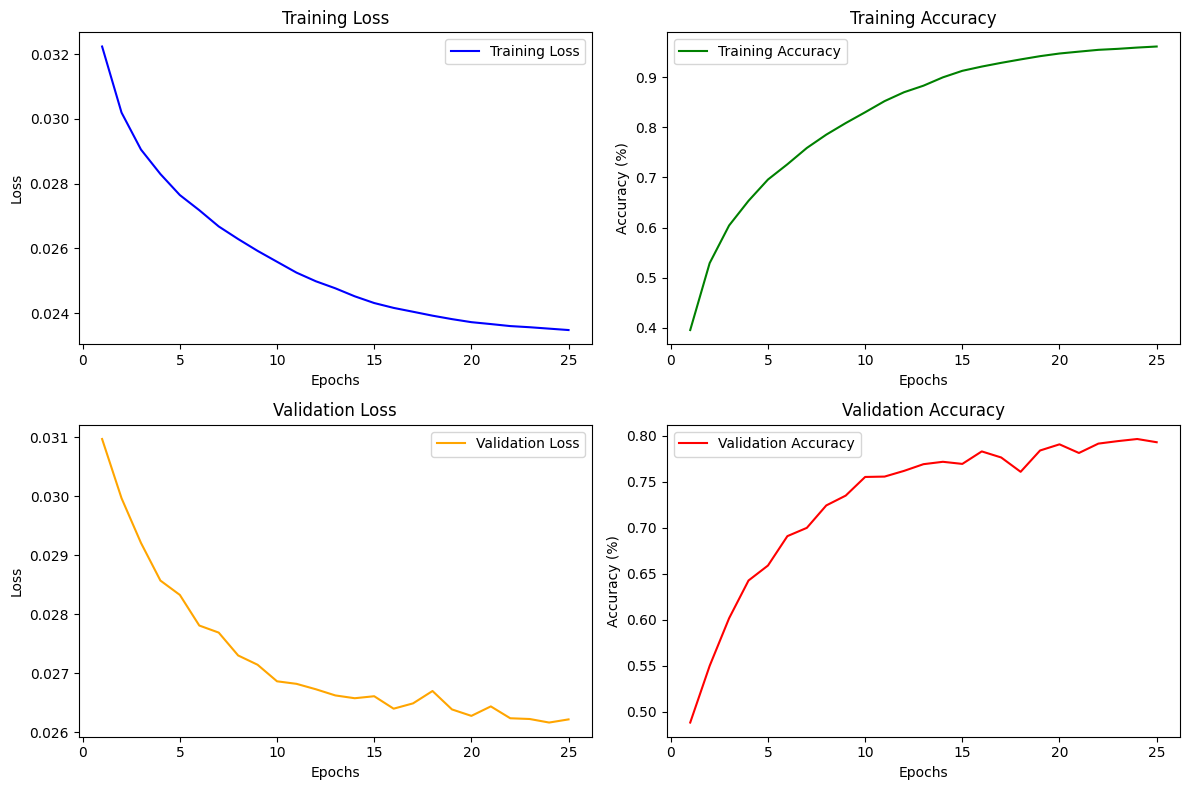

In [ ]:
import numpy as np

epochs=np.arange(1, 26)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(epochs, train_accs, label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(epochs, val_accs, label='Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
torch.save(model.state_dict(), 'vgg16.pth')

Question 3.8


In [ ]:
def visualize_filters(filters, n=6):

    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    fig, axes = plt.subplots(1, n, figsize=(15, 3))

    for i, ax in enumerate(axes):
        cax = ax.imshow(filters[i], cmap='gray')
        ax.axis('off')
        fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.045, pad=0.04)

    plt.show()

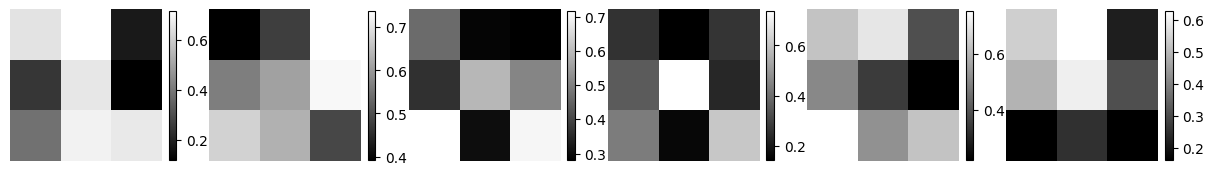

In [ ]:
visualize_filters(model.get_first_conv_layer_filters()[:,0,:,:])

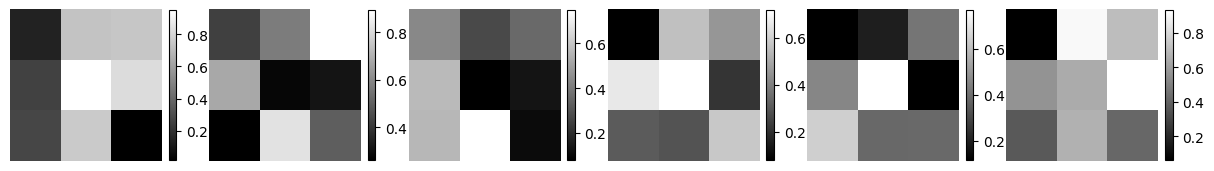

In [ ]:
visualize_filters(model.get_last_conv_layer_filters()[:,0,:,:])


In [ ]:
normalize = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std=[0.2023, 0.1994, 0.2010],
)
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    normalize
])

val_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:19<00:00, 8863200.76it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
if __name__ == "__main__":
  vis_image = None
  for data, labels in val_loader:
    vis_image = data[12].unsqueeze(0)
    break
vis_image.shape

torch.Size([1, 3, 227, 227])

In [ ]:
activations = {}

def register_hook(layer, layer_name):
    def hook(module, input, output):
        activations[layer_name] = output
    return hook
vgg_model = model
vgg_model.conv_layer_1.register_forward_hook(register_hook(vgg_model.conv_layer_1, 'first_conv_layer'))
vgg_model.conv_layer_13.register_forward_hook(register_hook(vgg_model.conv_layer_13, 'last_conv_layer'))

In [ ]:
img_tensor = vis_image.to(device)
with torch.no_grad():
    _ = vgg_model(img_tensor)


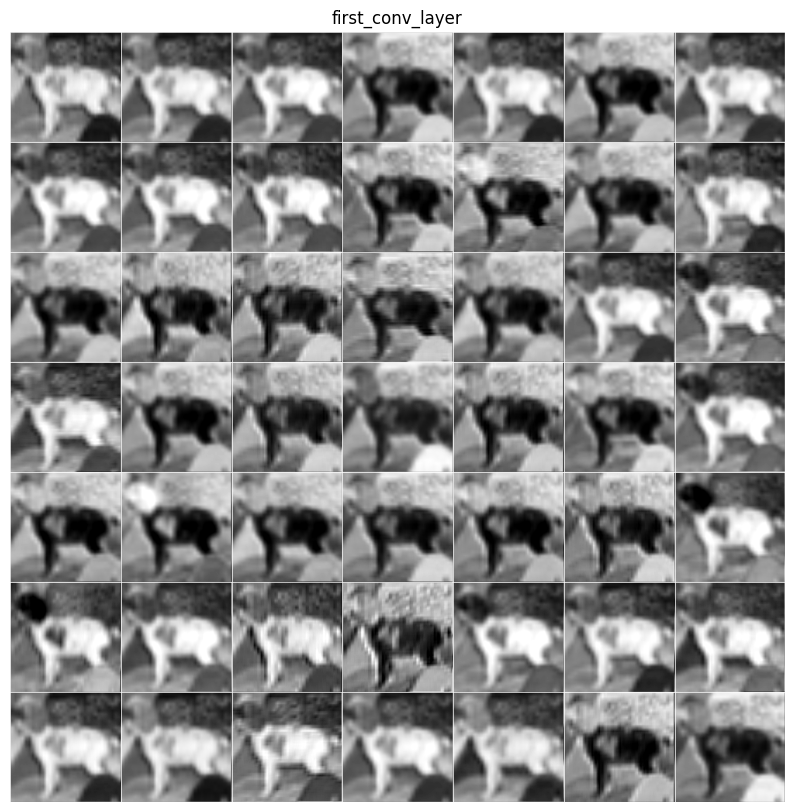

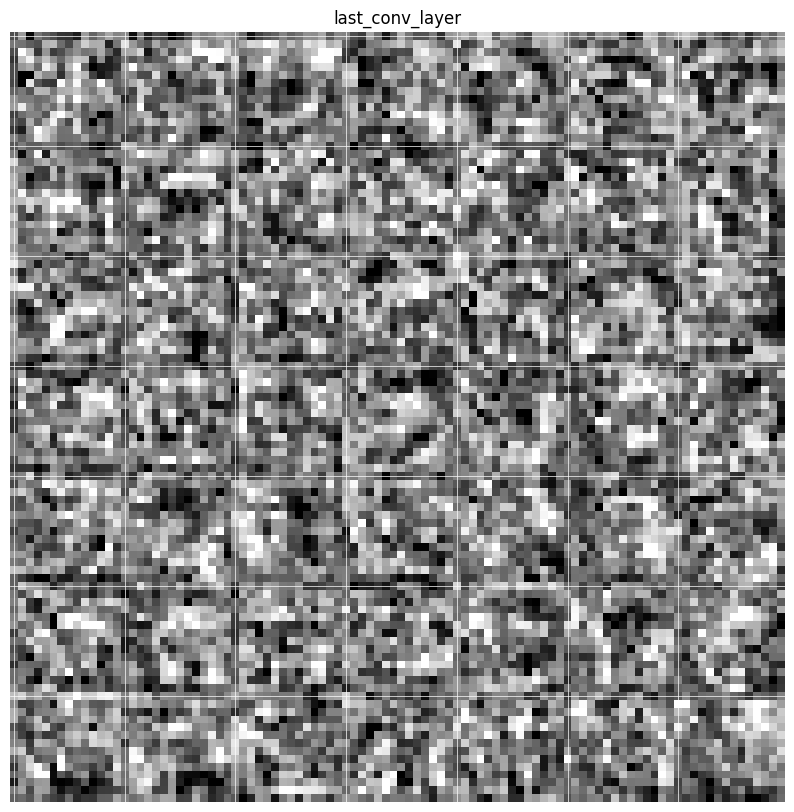

In [ ]:
for layer_name, activation in activations.items():
    n_features = 50
    size = activation.shape[2]

    n_cols = int(np.sqrt(n_features))
    display_grid = np.zeros((size * n_cols, n_cols * size))

    for col in range(n_cols):
        for row in range(n_cols):
            if col * n_cols + row < n_features:
                channel_image = activation[0, col * n_cols + row].cpu().numpy()
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = size / display_grid.shape[1]
    plt.figure(figsize=(10, 10))
    plt.title(layer_name)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

    for i in range(0, display_grid.shape[0], size):
        plt.axhline(y=i, color='white', linewidth=0.5)
    for j in range(0, display_grid.shape[1], size):
        plt.axvline(x=j, color='white', linewidth=0.5)

    plt.grid(False)
    plt.axis('off')

plt.show()


## 3.10 MLP

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

# Fix random seed, DO NOT CHANGE
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(227*227*3, 800)
        self.fc2 = nn.Linear(800, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = x.view(-1, 227*227*3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

normalize = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std=[0.2023, 0.1994, 0.2010],
)
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    normalize
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2)

val_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=False, num_workers=2)



model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_accs, train_losses, val_accs, val_losses = [], [], [], []

epochs = 25
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0
    for input, target in train_loader:
        input, target = input.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(input)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = outputs.max(1)
        train_acc += predicted.eq(target).sum().item()
    t_loss=train_loss/len(train_loader)
    train_accuracy = train_acc / len(train_loader.dataset)
    train_accs.append(train_accuracy)
    train_losses.append(t_loss)
    print(f"Epoch: {epoch} | Train Acc: {train_accuracy:.6f}   | Train Loss: {t_loss:.6f}")


    model.eval()
    val_loss = 0.
    val_acc = 0.
    with torch.no_grad():
        for input, target in val_loader:
            input, target = input.to(device), target.to(device)
            outputs = model(input)
            val_loss += criterion(outputs, target).item()
            _, predicted = outputs.max(1)
            val_acc += predicted.eq(target).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = val_acc / len(val_loader.dataset)
    val_accs.append(val_accuracy)
    val_losses.append(val_loss)
    print(f"Epoch: {epoch} | Val Acc: {val_accuracy:.6f}   | Val Loss: {val_loss:.6f}")

Files already downloaded and verified
Files already downloaded and verified
Epoch: 0 | Train Acc: 0.287240   | Train Loss: 2.727892
Epoch: 0 | Val Acc: 0.355100   | Val Loss: 1.792312
Epoch: 1 | Train Acc: 0.367020   | Train Loss: 1.752470
Epoch: 1 | Val Acc: 0.399200   | Val Loss: 1.683533
Epoch: 2 | Train Acc: 0.395700   | Train Loss: 1.687779
Epoch: 2 | Val Acc: 0.415400   | Val Loss: 1.642033
Epoch: 3 | Train Acc: 0.412880   | Train Loss: 1.650567
Epoch: 3 | Val Acc: 0.401700   | Val Loss: 1.637056
Epoch: 4 | Train Acc: 0.421800   | Train Loss: 1.633396
Epoch: 4 | Val Acc: 0.405300   | Val Loss: 1.696952
Epoch: 5 | Train Acc: 0.417080   | Train Loss: 1.637194
Epoch: 5 | Val Acc: 0.397300   | Val Loss: 1.715036
Epoch: 6 | Train Acc: 0.419240   | Train Loss: 1.623370
Epoch: 6 | Val Acc: 0.391200   | Val Loss: 1.687988
Epoch: 7 | Train Acc: 0.427500   | Train Loss: 1.607144
Epoch: 7 | Val Acc: 0.427500   | Val Loss: 1.646657
Epoch: 8 | Train Acc: 0.409160   | Train Loss: 1.656391
Epoc